# Lower Back Pain Symptoms dataset

    - 310 Observations, 13 Attributes (12 Numeric Predictors, 1 Binary Class Attribute - No Demographics)

    - identify a person is abnormal or normal using collected physical spine details/data.

In [1]:
import numpy as np
import pandas as pd


#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.warn('my warning')

#Scikit-learn Models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report,confusion_matrix,average_precision_score  

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


In [2]:
filename = 'Dataset_spine.csv'
dataset = pd.read_csv(filename)

In [3]:
dataset.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope(numeric),Direct_tilt(numeric),thoracic_slope(numeric),cervical_tilt(numeric),sacrum_angle(numeric),scoliosis_slope(numeric),Dependent variable,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN,NaN,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN,NaN,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,NaN,NaN,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN,NaN,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN,NaN,NaN
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,Abnormal,NaN,NaN,Attribute1 = pelvic_incidence (numeric)
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477,Abnormal,NaN,NaN,Attribute2 = pelvic_tilt (numeric)
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,Abnormal,NaN,NaN,Attribute3 = lumbar_lordosis_angle (numeric)
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,-20.020075,40.0276,Abnormal,NaN,NaN,Attribute4 = sacral_slope (numeric)
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,Abnormal,NaN,NaN,Attribute5 = pelvic_radius (numeric)


In [4]:
dataset.isnull().sum()

pelvic_incidence              0
pelvic_tilt                   0
lumbar_lordosis_angle         0
sacral_slope                  0
pelvic_radius                 0
degree_spondylolisthesis      0
pelvic_slope(numeric)         0
Direct_tilt(numeric)          0
thoracic_slope(numeric)       0
cervical_tilt(numeric)        0
sacrum_angle(numeric)         0
scoliosis_slope(numeric)      0
Dependent variable            0
Unnamed: 13                 310
Unnamed: 14                 310
Unnamed: 15                 296
dtype: int64

# Dropping the columns with NaN

These columns are the extra columns which doesnt being used for our analysis

In [5]:
dataset = dataset.drop('Unnamed: 13', axis = 1)
dataset = dataset.drop('Unnamed: 14', axis = 1)
dataset = dataset.drop('Unnamed: 15', axis =1)

In [6]:
dataset.shape

(310, 13)

# Data Exploration

In [7]:
dataset.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
pelvic_slope(numeric)       float64
Direct_tilt(numeric)        float64
thoracic_slope(numeric)     float64
cervical_tilt(numeric)      float64
sacrum_angle(numeric)       float64
scoliosis_slope(numeric)    float64
Dependent variable           object
dtype: object

Observations:
    - Target variable is of object type so doing an Label encoder to change it to integer and float

In [8]:
from sklearn.preprocessing import LabelEncoder

def Encoder(a):
    le = LabelEncoder()
    x = le.fit_transform(a)
    return x

dataset[["Dependent variable"]] = Encoder(dataset[["Dependent variable"]])

In [9]:
dataset.rename(columns = {'Dependent variable':'Target'}, inplace=True)
dataset.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope(numeric),Direct_tilt(numeric),thoracic_slope(numeric),cervical_tilt(numeric),sacrum_angle(numeric),scoliosis_slope(numeric),Target
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,0


0    210
1    100
Name: Target, dtype: int64


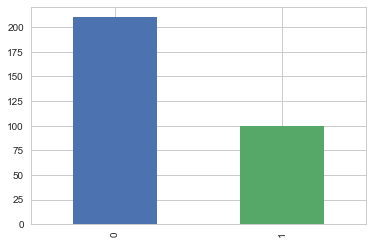

In [10]:
dataset.Target.value_counts().sort_index().plot.bar()
print(dataset.Target.value_counts())

It's clear that there is huge class imbalance is seen with 210 0's (Abnormal) and 100 1's (Normal). 

This condition will lead the model to be biased towards 0's.

In [11]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope(numeric),310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
Direct_tilt(numeric),310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope(numeric),310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt(numeric),310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


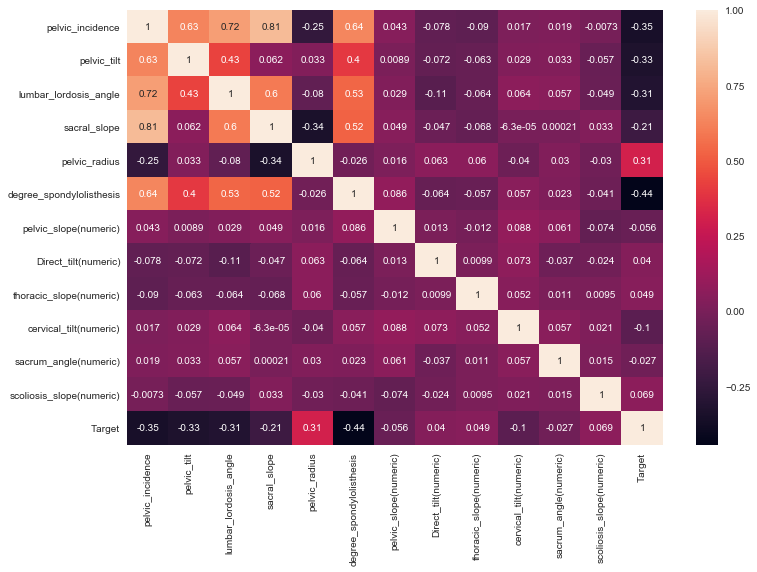

In [12]:
plt.subplots(figsize=(12,8))
sns.heatmap(dataset.corr(),annot=True)

The columns 'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle','sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis' are highly correlated. 

We can try doing PCA on top of it to reduce the high correlation.

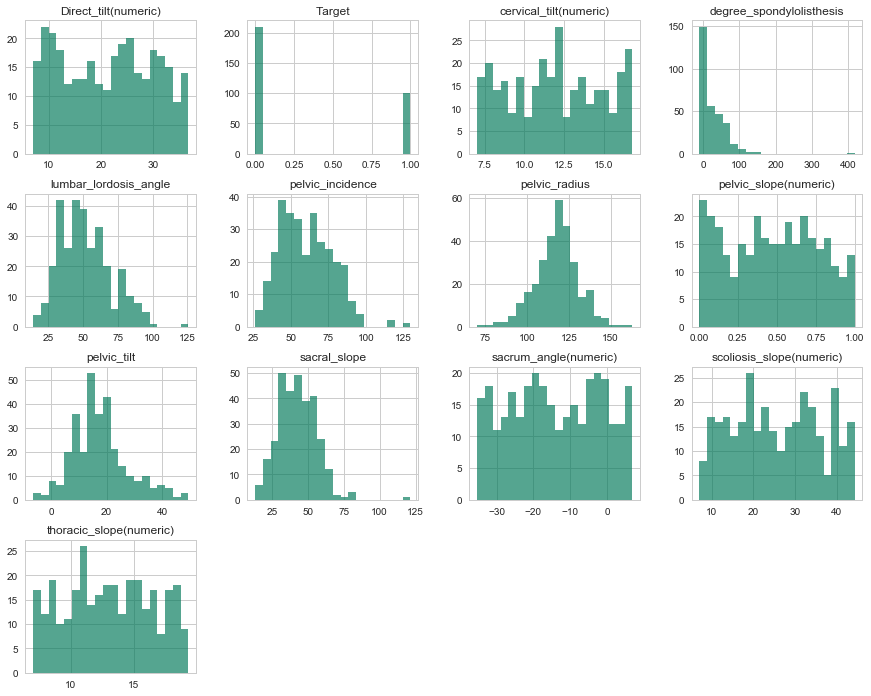

In [13]:
dataset.hist(figsize=(15,12),bins = 20, color="#007959AA")
plt.title("Features Distribution")
plt.show()

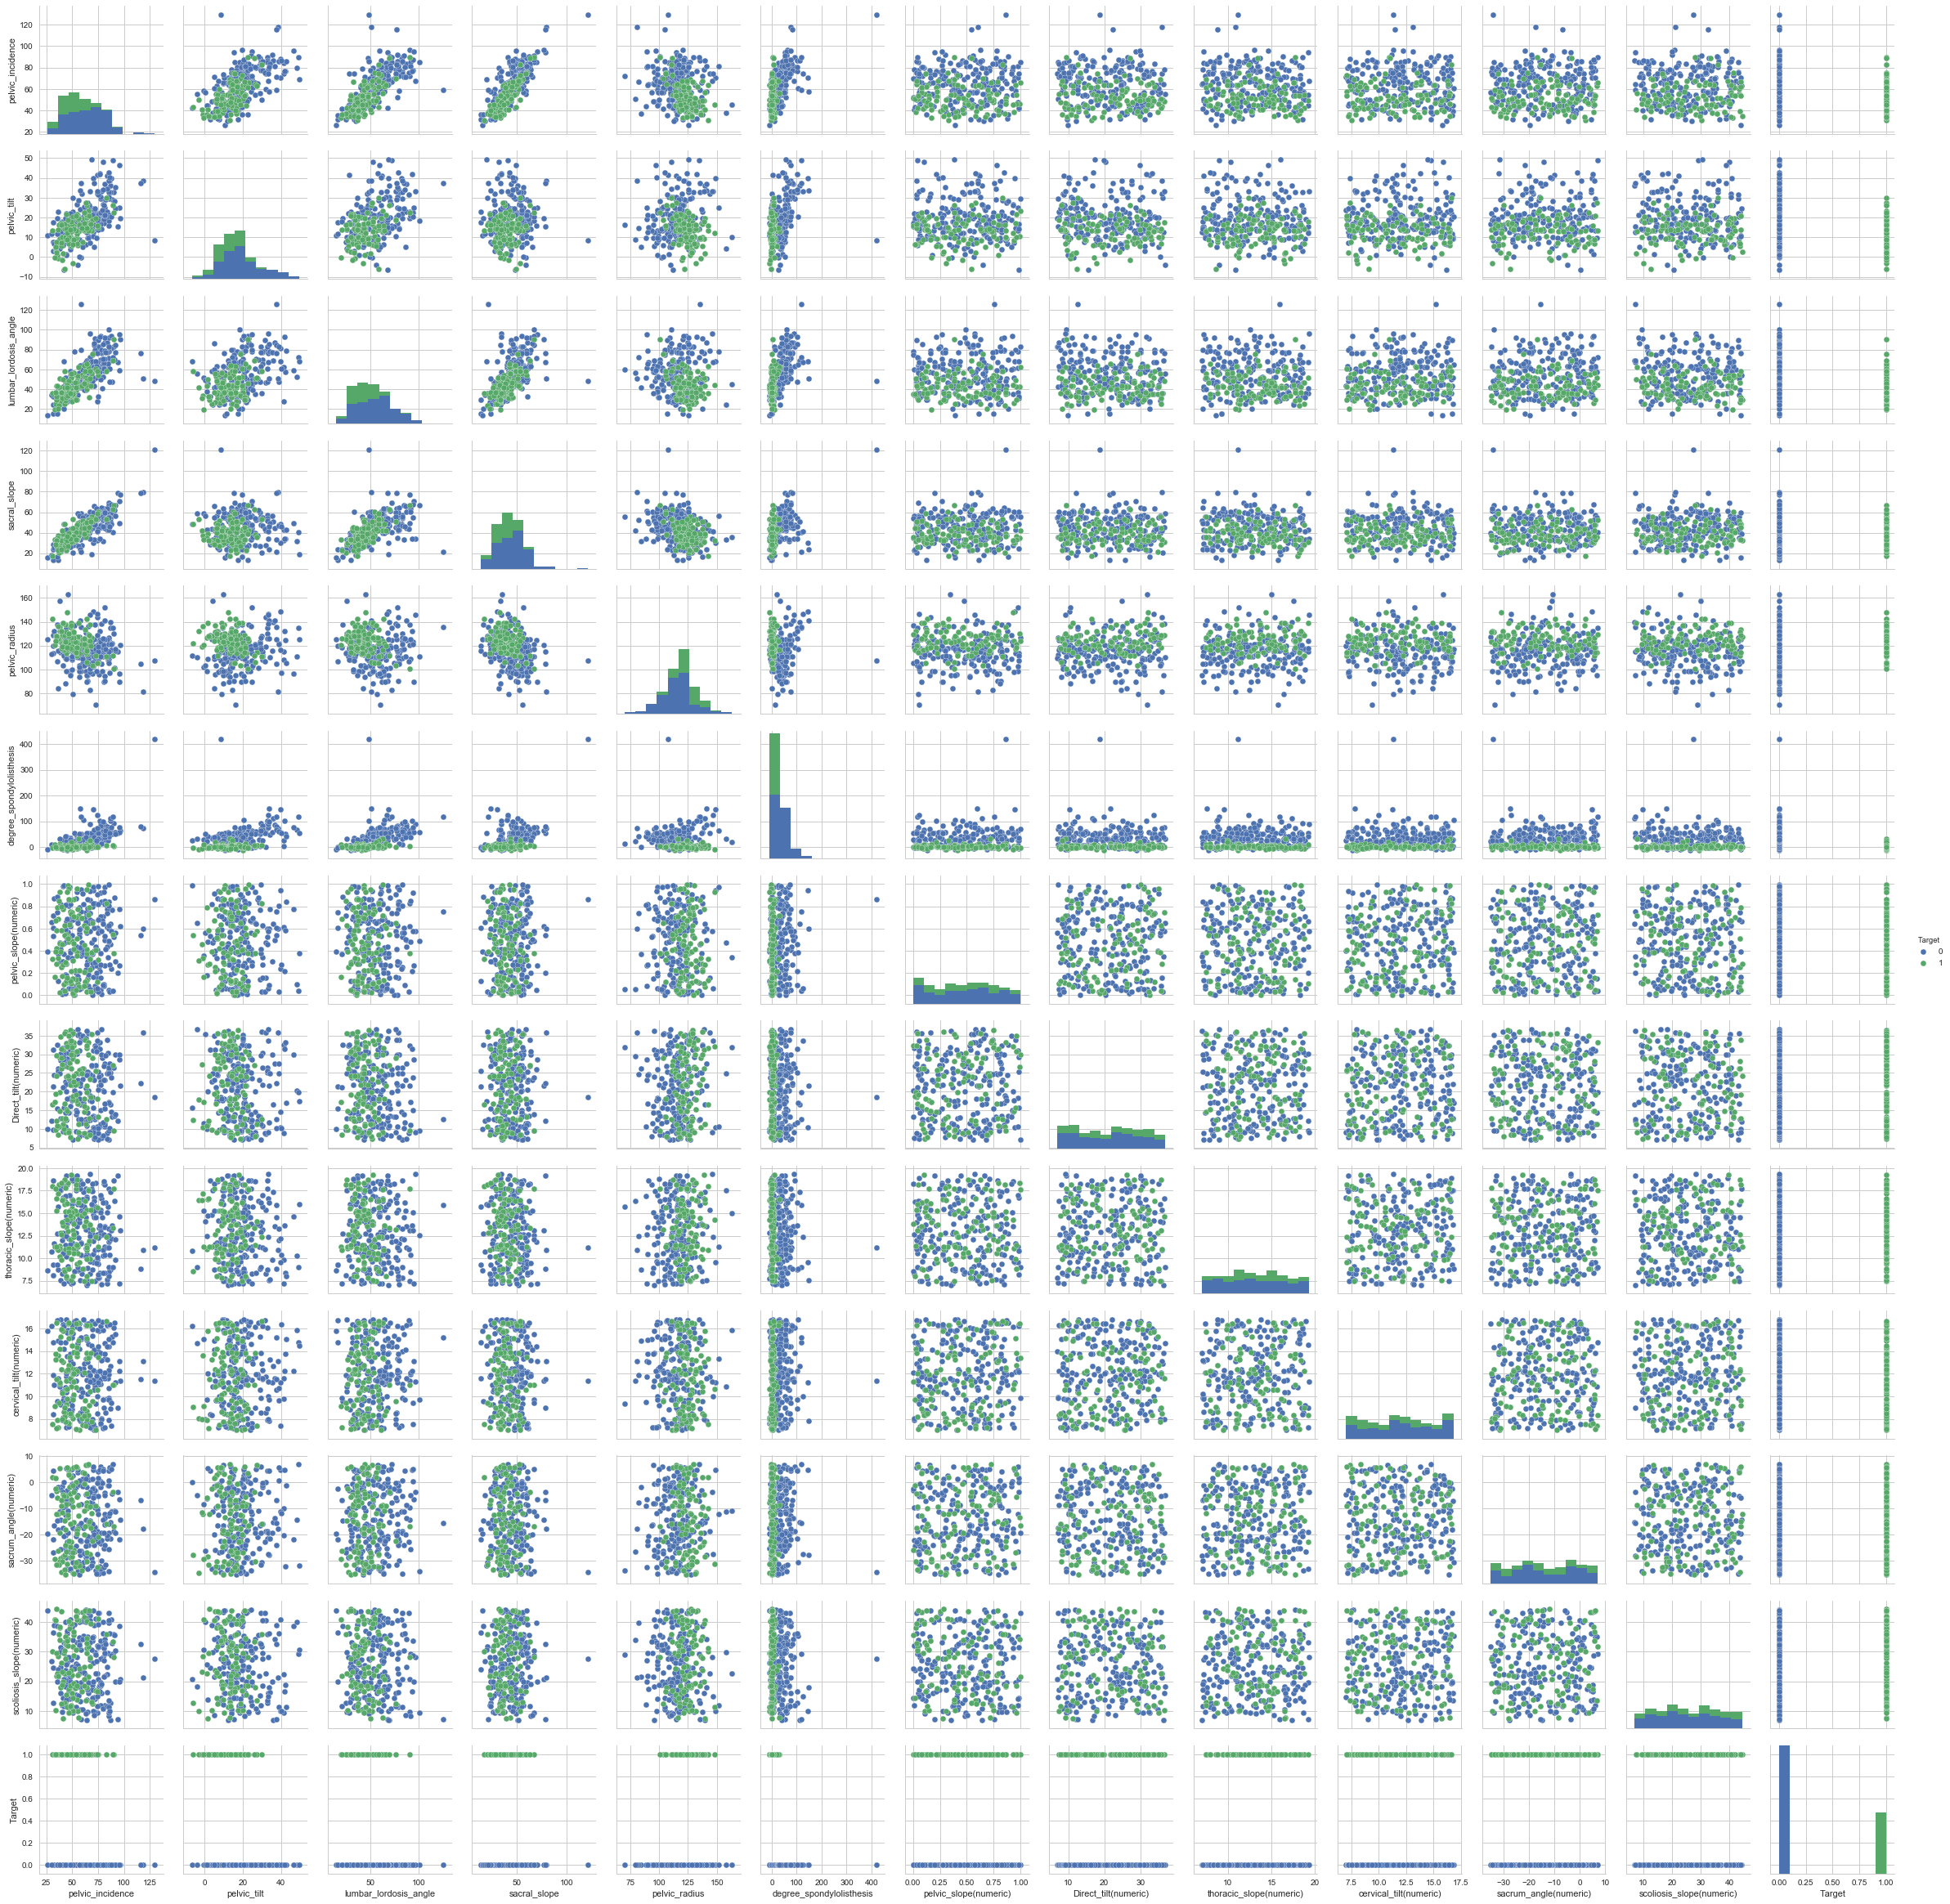

In [14]:
sns.pairplot(dataset, hue="Target")

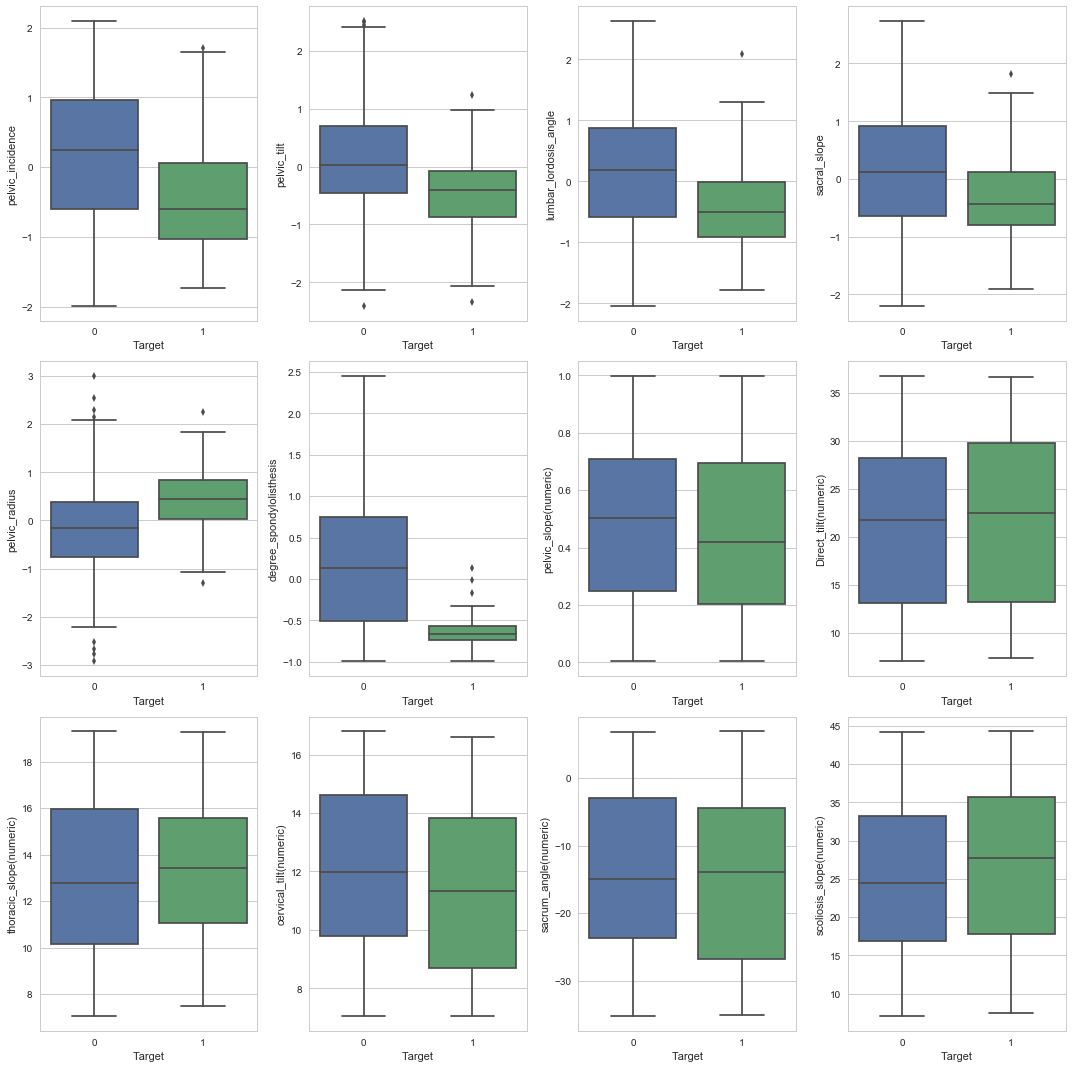

In [54]:
fig, axes = plt.subplots(3, 4, figsize = (15,15))
axes = axes.flatten()

for i in range(0,len(dataset.columns)-1):
    sns.boxplot(x="Target", y=dataset.iloc[:,i], data=dataset, orient='v', ax=axes[i])

plt.tight_layout()
plt.show()

# Detecting and Treatment of Outliers

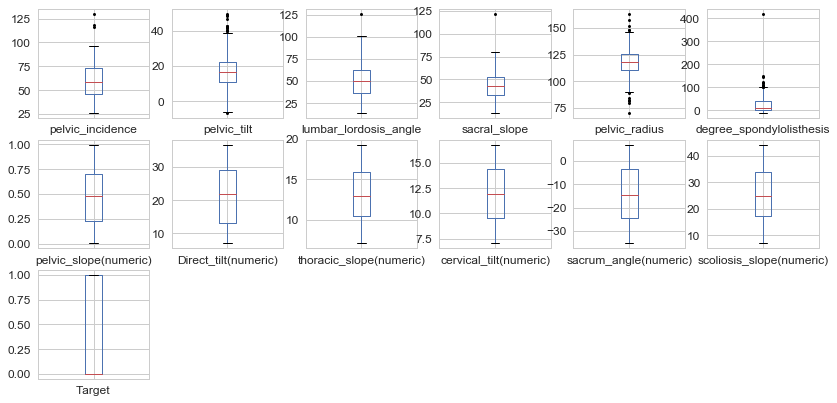

In [15]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(6,6), fontsize=12, figsize=(14,14),sym="k.")
plt.show()

# Observations:

    - There are few outliers in the 'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle','sacral_slope', 
    'pelvic_radius', 'degree_spondylolisthesis'columns.
    - Lets Treat those outliers

In [16]:
dataset.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope(numeric)', 'Direct_tilt(numeric)',
       'thoracic_slope(numeric)', 'cervical_tilt(numeric)',
       'sacrum_angle(numeric)', 'scoliosis_slope(numeric)', 'Target'],
      dtype='object')

In [17]:
dataset[['pelvic_incidence']] = dataset[['pelvic_incidence']].apply(zscore)
dataset[['pelvic_tilt']] = dataset[['pelvic_tilt']].apply(zscore)
dataset[['lumbar_lordosis_angle']] = dataset[['lumbar_lordosis_angle']].apply(zscore)
dataset[['sacral_slope']] = dataset[['sacral_slope']].apply(zscore)
dataset[['pelvic_radius']] = dataset[['pelvic_radius']].apply(zscore)
dataset[['degree_spondylolisthesis']] = dataset[['degree_spondylolisthesis']].apply(zscore)

def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 3*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median().axis=0       
    return group

dataset[['pelvic_incidence']] = replace(dataset[['pelvic_incidence']])
dataset[['pelvic_tilt']] = replace(dataset[['pelvic_tilt']])
dataset[['lumbar_lordosis_angle']] = replace(dataset[['lumbar_lordosis_angle']])
dataset[['sacral_slope']] = replace(dataset[['sacral_slope']])
dataset[['pelvic_radius']] = replace(dataset[['pelvic_radius']])
dataset[['degree_spondylolisthesis']] = replace(dataset[['degree_spondylolisthesis']])

# Plotting the graph after treating those outliers

Still there might be few outliers but thats fine!!

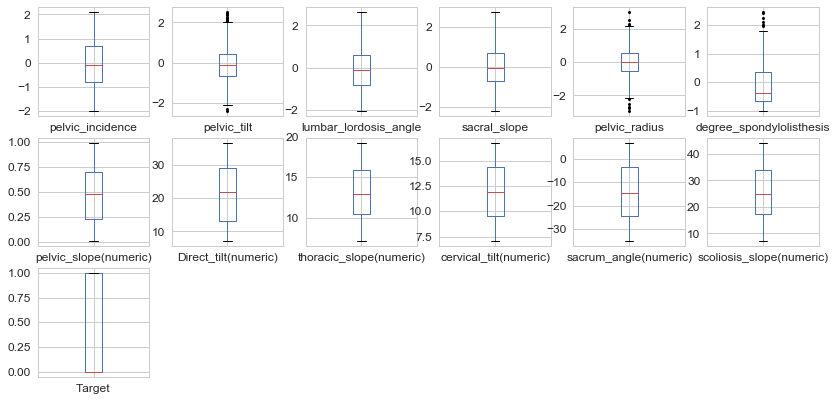

In [18]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(6,6), fontsize=12, figsize=(14,14),sym="k.")
plt.show()

# Handling Class Imbalance

    - Using SMOTE I have tried to handle the Class imbalance 

In [19]:
from collections import Counter
from imblearn.over_sampling import SMOTE

X = dataset.drop("Target", axis = 1)
y = dataset.Target

print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 210, 1: 100})
Resampled dataset shape Counter({0: 210, 1: 210})


# Try dimention reduction using PCA

In [20]:
sc = StandardScaler()
X_std =  sc.fit_transform(X_res) 
cov_matrix = np.cov(X_std.T)

#Compute the eigen vectors and values using linear algebra lambda decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11
0,3.456044,0.051604,0.225321,0.449169,1.260181,0.712461,1.135063,0.821956,1.062604,0.899913,0.98443,0.969893


In [21]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print("Cumulative Variance Explained:")
pd.DataFrame(cum_var_exp).transpose()

Cumulative Variance Explained:


,0,1,2,3,4,5,6,7,8,9,10,11
0,28.731797,39.208301,48.644635,57.478584,65.662634,73.725835,81.207256,88.040584,93.963621,97.69778,99.570988,100.0


With the Kaizer's Rule -  we would be selecting eigen values with no less than 1 - So 6 compenents has been selected
and we need to have atleast 80% of the information - so we select 6 components as it explains 81% of info

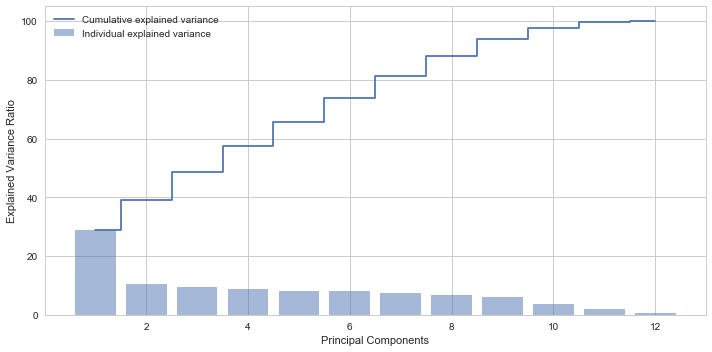

In [22]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Model Building and Evaluation


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3 , random_state=1)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [24]:
from sklearn.decomposition import PCA

X_train_reduced = PCA(n_components=6).fit_transform(X_train_std)
X_test_reduced = PCA(n_components=6).fit_transform(X_test_std)

In [25]:
num_folds = 10
seed = 7
scoring = 'accuracy'

In [26]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)  
    cv_results = cross_val_score(model, X_train_reduced, y_train, cv=kfold, scoring=scoring)  
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

LR: 0.749310 (0.118405)
NB: 0.755172 (0.078063)
CART: 0.707011 (0.117927)


In [27]:
#Logistic Regression
parameters = {'C':np.logspace(0, 4, 10), 
              'penalty' : ['l1', 'l2']}

model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=parameters, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_reduced, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.748299 using {'C': 1.0, 'penalty': 'l1'}


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [28]:
#Decision Tree Hyper Tuning
max_depth = np.array([1,3,5,7,9,11,13,15,17,19,21])
min_samples_leaf = np.array([3,5,7,9,11,13,15,17,19,21])
param_grid = dict(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
#param_grid = dict(max_depth=max_depth)
model = DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_reduced, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.714286 using {'max_depth': 7, 'min_samples_leaf': 3}


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [29]:
models = []
models.append(('LR', LogisticRegression(C = 21.544346900318832, penalty = 'l1')))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 3)))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)  
    cv_results = cross_val_score(model, X_train_reduced, y_train, cv=kfold, scoring=scoring)  
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

LR: 0.742414 (0.113545)
NB: 0.755172 (0.078063)
CART: 0.645862 (0.125142)


In [30]:
models = []
models.append(('LR', LogisticRegression(C = 21.544346900318832, penalty = 'l1')))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 3)))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)  
    cv_results = cross_val_score(model, X_test_reduced, y_test, cv=kfold, scoring=scoring)  
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) 
    print(msg)

LR: 0.723718 (0.114291)
NB: 0.784615 (0.083884)
CART: 0.680769 (0.085514)


# Ensemble Models

    AdaBoost Classifier - Since it works best with classification problems
    RandomForest Classifier

In [31]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('RF', RandomForestClassifier()))

results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train_reduced, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.711149 (0.080671)
RF: 0.769080 (0.079283)


In [32]:
# Adaboost Classifier

learning_rate=np.array([0.05, 0.1, 0.25, 0.5, 0.75, 1])
n_estimators=np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
model = AdaBoostClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_reduced, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.748299 using {'learning_rate': 0.25, 'n_estimators': 60}


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [33]:
# Parameters for RF

# params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
param_grid = dict(n_estimators=np.array([10,25,50,75,100]),
                  max_depth=np.array([1,2,3,4,5,6,7,8,9,10]))

# Tune scaled Random Forest
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_reduced, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.795918 using {'max_depth': 8, 'n_estimators': 50}


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier(learning_rate = 0.25, n_estimators = 60)))
ensembles.append(('RF', RandomForestClassifier(max_depth = 8, n_estimators = 50)))

results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train_reduced, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.748506 (0.102604)
RF: 0.765632 (0.103435)


In [35]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier(learning_rate = 0.25, n_estimators = 60)))
ensembles.append(('RF', RandomForestClassifier(max_depth = 8, n_estimators = 50)))

results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_test_reduced, y_test, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.731410 (0.107549)
RF: 0.753205 (0.100060)


In [36]:
models = []
models.append(('LogisticRrgression', LogisticRegression(C = 21.544346900318832, penalty = 'l1')))
models.append(('CART', DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 3)))
models.append(('Naive Bayes', GaussianNB()))
models.append(('AB', AdaBoostClassifier(learning_rate = 0.25, n_estimators = 60)))
models.append(('RF', RandomForestClassifier(max_depth = 8, n_estimators = 50)))

f1score = []
precisionscore = []
recallscore = []
avg_pre_rec_score = []
names = []
model_acc_test = []
model_acc_train = []

for name, model in models: 
       
    # fitting the train data
    model.fit(X_train_reduced, y_train)
    
    #predicting on train data
    y_pred_train = model.predict(X_train_reduced)
    score_train = accuracy_score(y_train, y_pred_train)
    
    #predicting the validation data  
    y_pred_test = model.predict(X_test_reduced)
    score_test = accuracy_score(y_test, y_pred_test)
    
    #acurracy score list
    model_acc_test.append(round(score_test,4))
    model_acc_train.append(round(score_train,4))
    
    #Build Confusion Matrix
    print( "Confusion Matrix of {}: \n ".format(name), confusion_matrix( y_test , y_pred_test ))
    
    #Precision, Recall and F1 score
    f1score.append(f1_score(y_test, y_pred_test))
    precisionscore.append(precision_score(y_test, y_pred_test))
    recallscore.append(recall_score(y_test, y_pred_test))
    
    #Calculating average precision 
    try:
        y_pred_score = model.decision_function(X_test_reduced)
    except:
        y_pred_score = model.predict_proba(X_test_reduced)[:,1]
    average_precision = average_precision_score(y_test, y_pred_score)
    avg_pre_rec_score.append(average_precision)
        
    names.append(name)

Confusion Matrix of LogisticRrgression: 
  [[39 17]
 [24 46]]
Confusion Matrix of CART: 
  [[37 19]
 [10 60]]
Confusion Matrix of Naive Bayes: 
  [[38 18]
 [11 59]]
Confusion Matrix of AB: 
  [[36 20]
 [12 58]]
Confusion Matrix of RF: 
  [[40 16]
 [21 49]]


In [37]:
accuracy_df = pd.DataFrame({'Model':names ,'Train Accuracy' :np.round(model_acc_train,2),
                            'Validation Score': np.round(model_acc_test,2),
                            'Precision':precisionscore, 
                            'Recall':recallscore,
                            'F1 Score':f1score,
                            'Avg Precision Recall':avg_pre_rec_score })    
accuracy_df 

,Model,Train Accuracy,Validation Score,Precision,Recall,F1 Score,Avg Precision Recall
0,LogisticRrgression,0.76,0.67,0.730159,0.657143,0.691729,0.688105
1,CART,0.83,0.77,0.759494,0.857143,0.805369,0.728735
2,Naive Bayes,0.77,0.77,0.766234,0.842857,0.802721,0.740681
3,AB,0.83,0.75,0.743590,0.828571,0.783784,0.673358
4,RF,0.96,0.71,0.753846,0.700000,0.725926,0.760398


# Final Model

In [46]:
NB_cls = GaussianNB()
NB_cls.fit(X_train_reduced, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

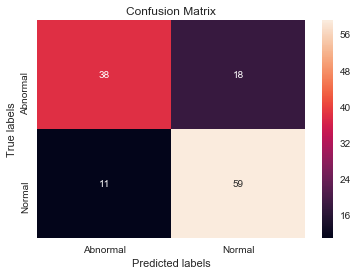

TrueNegative: 38
FalseNegative: 11
TruePostive: 59
FalsePostive: 18
Sensitivity 0.8428571428571429
Specificity 0.6785714285714286
F1 Score:  0.8027210884353742
Precision:  0.7662337662337663
Recall:  0.8428571428571429
AUC:  0.7406811741739934
Total Accuracy :  0.77


In [52]:
y_pred_test = NB_cls.predict(X_test_reduced)
score_test = accuracy_score(y_test, y_pred_test)

ax= plt.subplot()
labels = ['Abnormal','Normal']
CM = confusion_matrix(y_test , y_pred_test)
sns.heatmap(CM, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Abnormal', 'Normal']); ax.yaxis.set_ticklabels(['Abnormal', 'Normal']);
plt.show()

print ("TrueNegative:", CM[0][0])
print ("FalseNegative:", CM[1][0])
print ("TruePostive:", CM[1][1])
print ("FalsePostive:", CM[0][1])

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Sensitivity",TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity",TNR)
    
#Precision, Recall and F1 score
F1_score = f1_score(y_test, y_pred_test)
print("F1 Score: ", F1_score)
Precision_score = precision_score(y_test, y_pred_test)
print("Precision: ", Precision_score)
Recall_score = recall_score(y_test, y_pred_test)
print("Recall: ", Recall_score)
    
#Calculating average precision 
try:
    y_pred_score = NB_cls.decision_function(X_test_reduced)
except:
    y_pred_score = NB_cls.predict_proba(X_test_reduced)[:,1]

average_precision = average_precision_score(y_test, y_pred_score)
print("AUC: ", average_precision)

print( 'Total Accuracy : ',np.round( accuracy_score( y_test, y_pred_test ), 2 ) )